In [1]:
import pandas as pd
import warnings

The current version of seaborn generates a bunch of warnings they will be ignored by following command.

In [2]:
warnings.filterwarnings("ignore")

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", color_codes=True)

With following command, the iris dataset will be read as Pandas DataFrame.

In [4]:
iris = pd.read_csv("iris_data.csv") 
iris.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


Let's see how many examples we have in each species.

In [5]:
iris["Species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

We want to plot figures using pylab: we'll use the following command to make sure the figures appear in-line (this only works within ipython notebook):

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The first way we can plot things is using the **.plot** extension from Pandas dataframes
We'll use this to make a scatterplot of the Iris features.

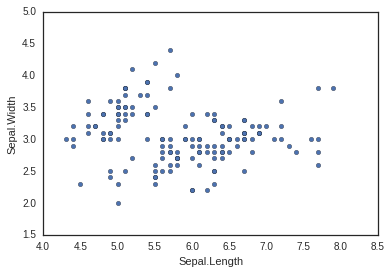

In [10]:
iris.plot(kind="scatter", x="Sepal.Length", y="Sepal.Width")
plt.show()

We can also use the seaborn library to make a similar plot. A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure.

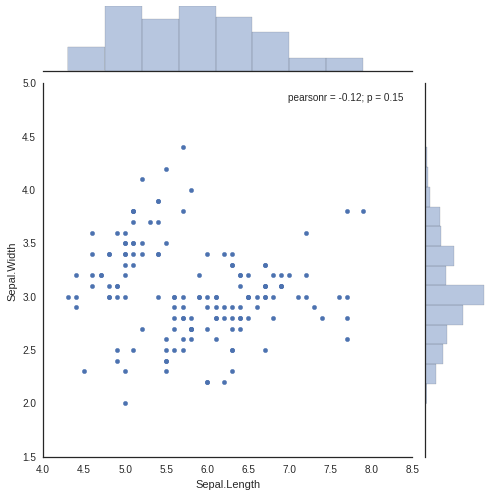

In [12]:
sns.jointplot(x="Sepal.Length", y="Sepal.Width", data=iris, size=7)
plt.show()

One piece of information missing in the plots above is what species each plant is.
We'll use seaborn's FacetGrid to color the scatterplot by species.

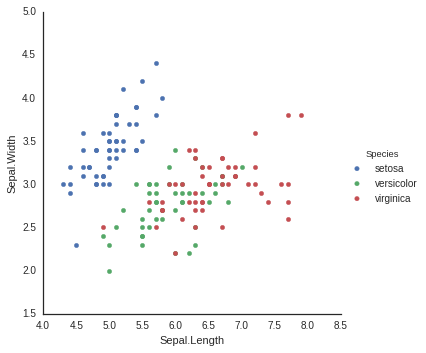

In [13]:
sns.FacetGrid(iris, hue="Species", size=5).map(plt.scatter, "Sepal.Length", "Sepal.Width").add_legend()
plt.show()

We can look at an individual feature in Seaborn through a boxplot.

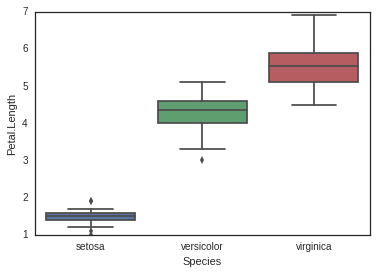

In [14]:
sns.boxplot(x="Species", y="Petal.Length", data=iris)
plt.show()

Also, we can extend this plot adding a layer of individual points on top of it, through Seaborn's striplot. We'll use **jitter=True** so that all the points don't fall in single vertical lines above the species. Saving the resulting axes as ax each time causes the resulting plot to be shown on top of the previous axes.

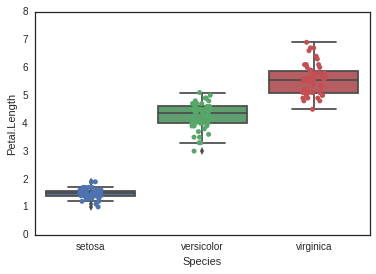

In [15]:
ax = sns.boxplot(x="Species", y="Petal.Length", data=iris)
ax = sns.stripplot(x="Species", y="Petal.Length", data=iris, jitter=True, edgecolor="gray")
plt.show()

A violin plot combines the benefits of the previous two plots and simplifies them. Denser regions of the data are fatter, and sparser thiner in a violin plot

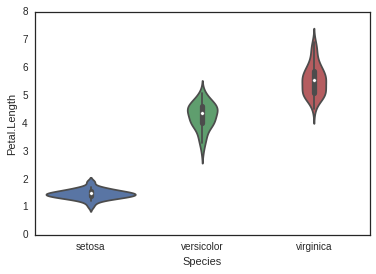

In [16]:
sns.violinplot(x="Species", y="Petal.Length", data=iris, size=6)
plt.show()

A final seaborn plot is useful for looking at univariate relations at the kdeplot which creates and visualizes a kernel density estimate of the underlying feature.

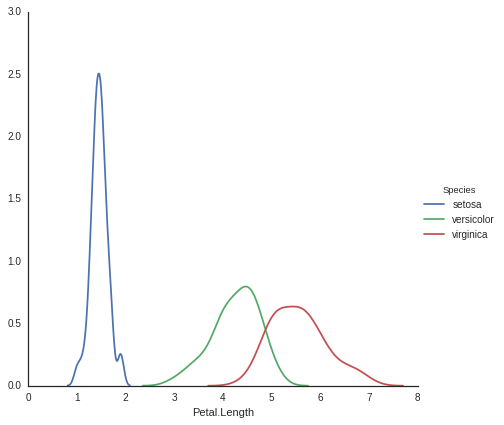

In [17]:
sns.FacetGrid(iris, hue="Species", size=6).map(sns.kdeplot, "Petal.Length").add_legend()
plt.show()

Another useful seaborn plot is the pairplot. It shows the bivariate relation between each pair of features. From the pairplot, we'll see that the Iris-setosa species is separataed from the other two across all feature combinations.

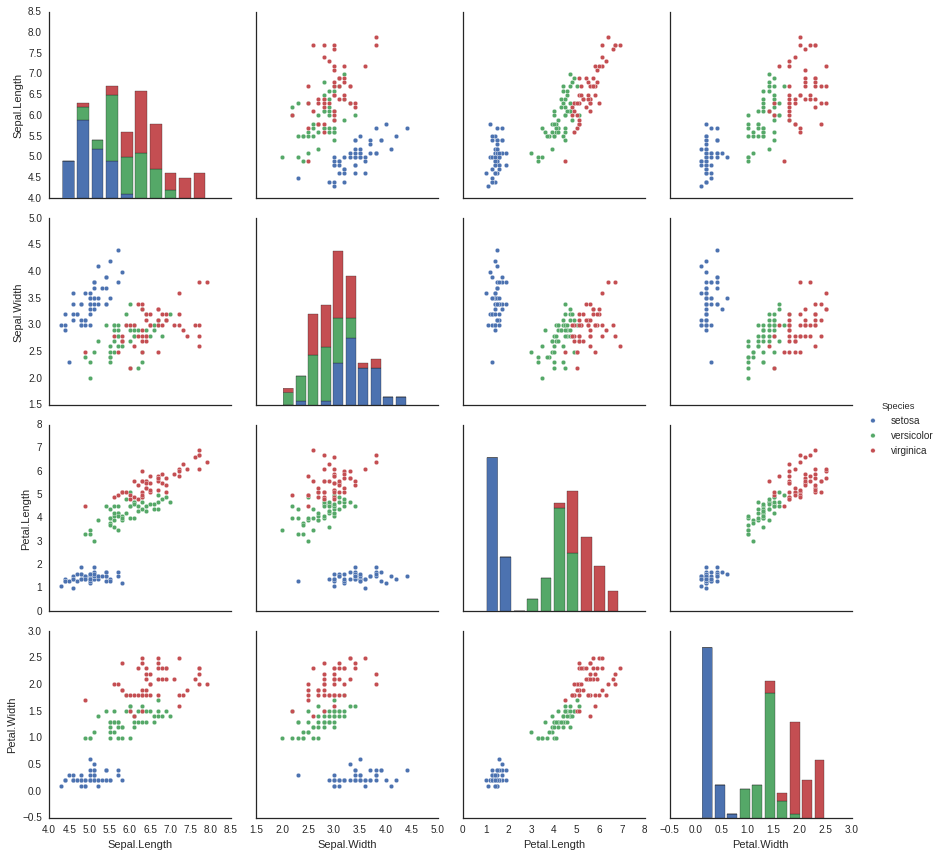

In [18]:
sns.pairplot(iris.drop("id", axis=1), hue="Species", size=3)
plt.show()